In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
import nltk
import re
import numpy as np

nltk.download('stopwords')
nltk.download('reuters')
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.corpus import reuters

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/divyansh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package reuters to /home/divyansh/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /home/divyansh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
def preprocess(content):
    
    words = word_tokenize(content)
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    filtered_words = [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words]
    # print(len(filtered_words))
    content = ' '.join(filtered_words)
    content = re.sub(r"[^a-zA-Z0-9. ]", "", content)
    content = re.sub(r'\s+', ' ', content)
    content = content.lower().strip()     
    return content

def euclidean(vec1,vec2):
    return np.linalg.norm(vec1 - vec2)

with open('GloVe/text8', 'r') as f:
    content = f.read().lower()

content=content[:1000000]
# print(content[:1000])
sentences=[content.split(" ")]

# print(sentences[:10])

In [10]:
model = Word2Vec(sentences, min_count=1, vector_size=100, window=5, sg=1, workers=4)


9399
{('old', 'new'): 0.535303, ('hard', 'difficult'): 0.5018999, ('hard', 'easy'): 0.3000028, ('fast', 'rapid'): 0.27536714, ('short', 'long'): 0.75090796, ('stupid', 'dumb'): 0.086510584, ('weird', 'strange'): 0.07788487, ('wide', 'narrow'): 0.4515856, ('bad', 'awful'): 0.21611969, ('easy', 'difficult'): 0.787063, ('bad', 'terrible'): 0.23389582, ('hard', 'simple'): 0.08970692, ('happy', 'mad'): 0.091338806, ('large', 'huge'): 0.64270514, ('hard', 'tough'): 0.3134427, ('new', 'fresh'): 1.1474775, ('quick', 'rapid'): 0.078163475, ('strange', 'odd'): 0.08385966, ('happy', 'angry'): 0.08072137, ('narrow', 'broad'): 0.21340607, ('simple', 'easy'): 0.33509842, ('old', 'fresh'): 0.6208373, ('apparent', 'obvious'): 0.19743408, ('nice', 'generous'): 0.22519782, ('weird', 'normal'): 1.3986548, ('weird', 'odd'): 0.0808176, ('bad', 'immoral'): 0.2286999, ('dumb', 'dense'): 0.08056731, ('large', 'big'): 0.15163706, ('big', 'broad'): 0.32518822, ('strong', 'proud'): 0.6311309, ('unnecessary', 'ne

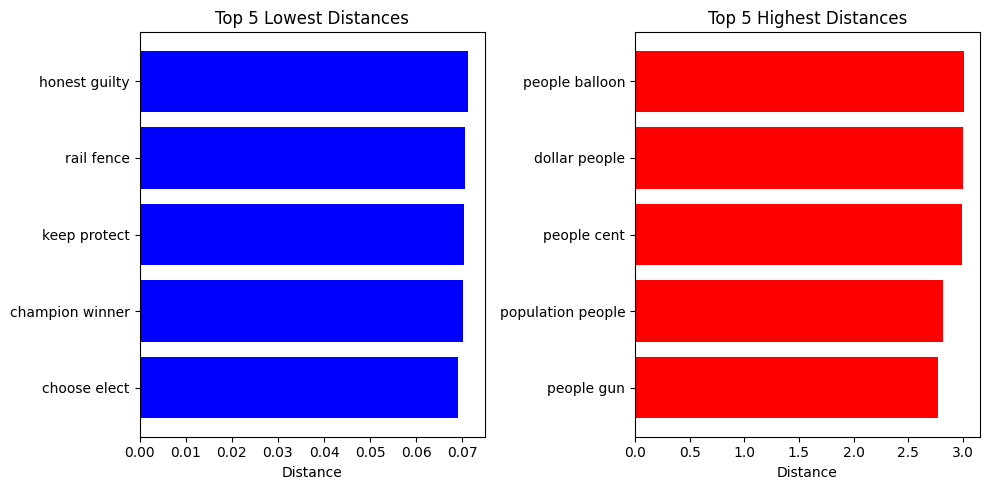

In [11]:
with open('vocab.txt',"r") as f:
    unique_words=f.readlines()
    
vocab=[]

for word in unique_words:
    vocab.append(word.strip())

vocab_size=len(vocab)+1
print(vocab_size)

filename = 'SimLex-999/SimLex-999.txt'


# print(vocab)

with open(filename,"r") as f:
    content = f.readlines()
content = content[1:]

found=0
notfound=0
dicts = {}
for line in content:
    word1 = line.split()[0]
    word2 = line.split()[1]


    try:
        found+=1
        # print("Word found !",end=" ")
        # print(word1,word2,euclidean(model.wv[word1],model.wv[word2]))
        dicts[(word1,word2)] = euclidean(model.wv[word1],model.wv[word2])
    except KeyError:
        notfound+=1
        
#sort dict based on euclidean distance
sorted_distances = sorted(dicts.items(), key=lambda x: x[1])
print(dicts)

##plot 5 highest and 5 lowest distances
import matplotlib.pyplot as plt

top_5_highest = sorted_distances[-5:]
top_word_pairs = [pair[0] for pair in top_5_highest]
top_distances = [pair[1] for pair in top_5_highest]

# Extract top 5 lowest distances and corresponding word pairs
bottom_5_lowest = sorted_distances[:5]
bottom_word_pairs = [pair[0] for pair in bottom_5_lowest]
bottom_distances = [pair[1] for pair in bottom_5_lowest]

# Plot
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.barh(range(len(bottom_word_pairs)), bottom_distances, color='blue')
plt.yticks(range(len(bottom_word_pairs)), [' '.join(pair) for pair in bottom_word_pairs])
plt.xlabel('Distance')
plt.title('Top 5 Lowest Distances')

plt.subplot(1, 2, 2)
plt.barh(range(len(top_word_pairs)), top_distances, color='red')
plt.yticks(range(len(top_word_pairs)), [' '.join(pair) for pair in top_word_pairs])
plt.xlabel('Distance')
plt.title('Top 5 Highest Distances')

plt.tight_layout()
plt.show()



# print(found,notfound)